In [63]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches

# 1. The Period of the Solar Activity
## - Data from "https://www.sidc.be/SILSO/datafiles"

In [64]:
data = np.genfromtxt('./SN_m_tot_V2.0.txt')

date = data[:,2]
spotnum = data[:,3]

Text(0, 0.5, 'Mean Sunspot Number')

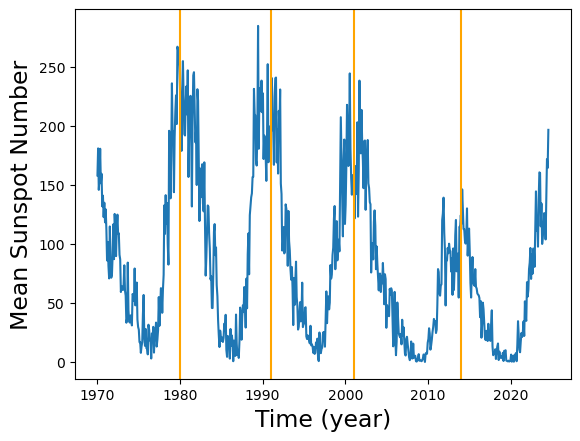

In [66]:
date_cut = date[date>1970]
spotnum_cut = spotnum[date>1970]
max_date = [1980, 1991, 2001, 2014]

plt.plot(date_cut, spotnum_cut)
for i in max_date:
    plt.axvline(x = i, color = 'orange')
    
plt.xlabel('Time (year)', fontsize = 17)
plt.ylabel('Mean Sunspot Number', fontsize = 17)

In [62]:
delta_date = []

for i in range(len(max_date)-1):
    delta_date.append(max_date[i+1] - max_date[i])
    
print(np.average(delta_date)) #in units of years

11.333333333333334


# 2. The Rotation of Sunspots
## (1) Images from "sdo.gsfc.nasa.gov" 

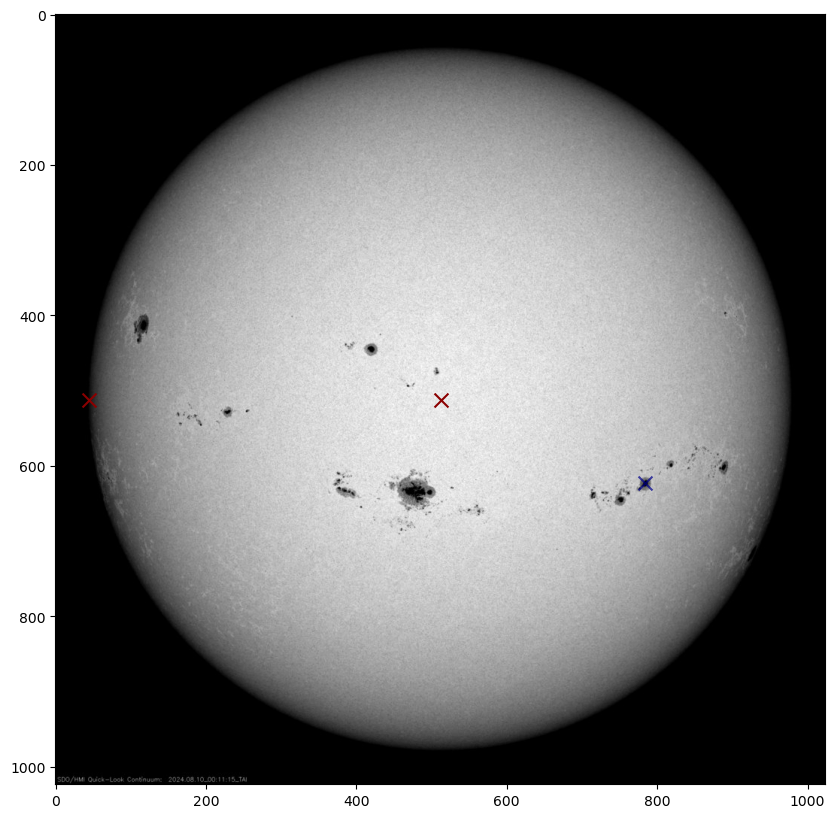

In [5]:
#Finding the position of sunspots
image = mpimg.imread('20240810_001038_1024_HMII.jpg')
fig, axs = plt.subplots(figsize = (10,10))
plt.imshow(image, cmap = 'gray')
plt.scatter([512],[512], marker = 'x', color = 'darkred', s=100) # center position
plt.scatter([45],[512], marker = 'x', color = 'darkred', s=100) # to calculate the solar radius
r = 512 - 45 # radius in the pixel unit

plt.scatter([784],[623], marker = 'x', color = 'darkblue', alpha = 0.7, s=100) # Position of the sunspot
plt.show()

In [6]:
file_list = ['20240804_001038_1024_HMII.jpg',
             '20240805_001038_1024_HMII.jpg',
             '20240806_001038_1024_HMII.jpg',
             '20240807_001038_1024_HMII.jpg',
             '20240808_001038_1024_HMII.jpg',
             '20240809_001038_1024_HMII.jpg',
             '20240810_001038_1024_HMII.jpg',]

y_list = [179, 272, 374, 480, 587, 691, 784]
z_list = [615, 620, 624, 624, 628, 626, 623]

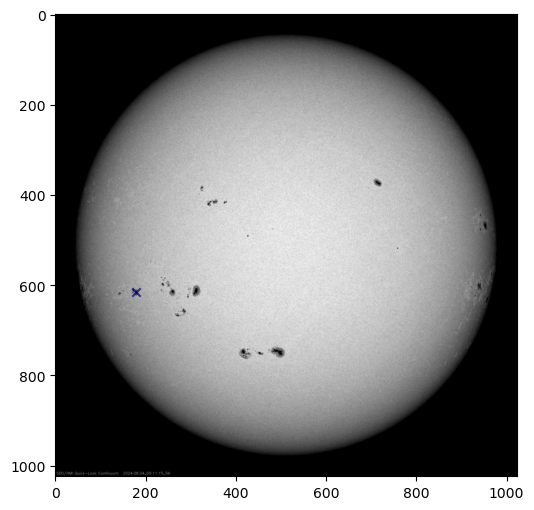

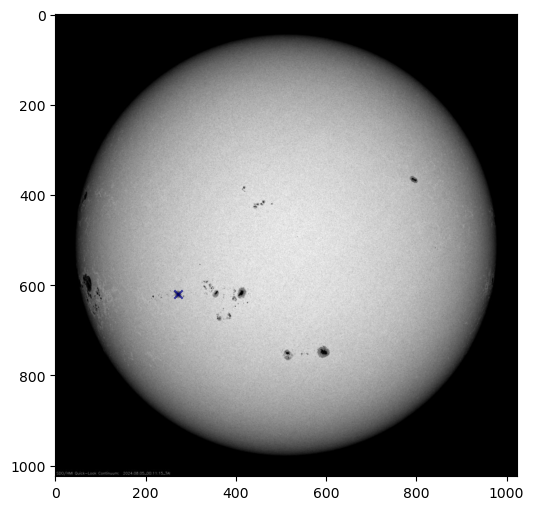

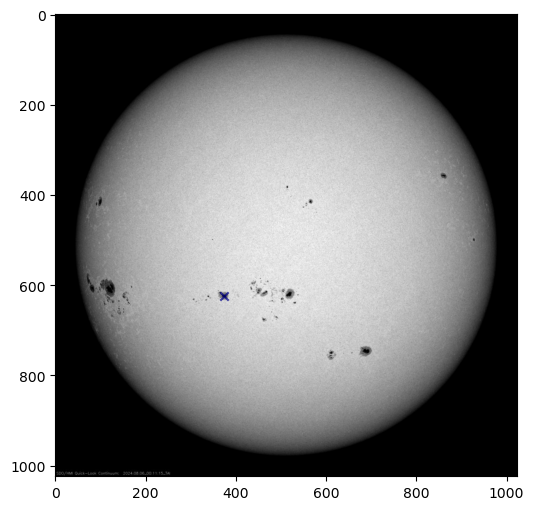

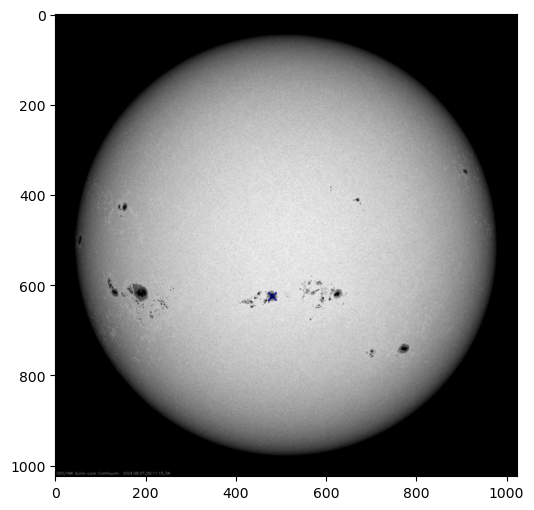

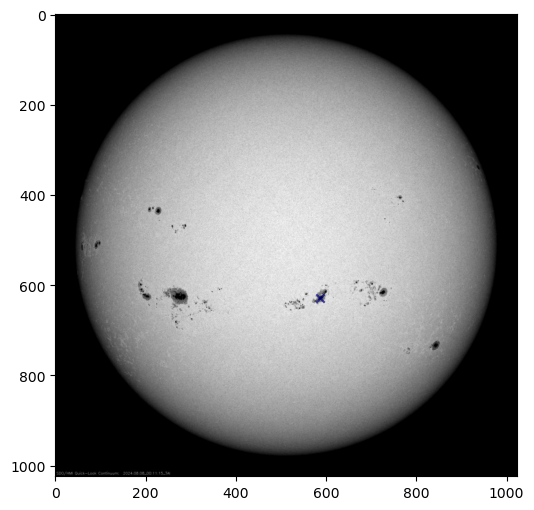

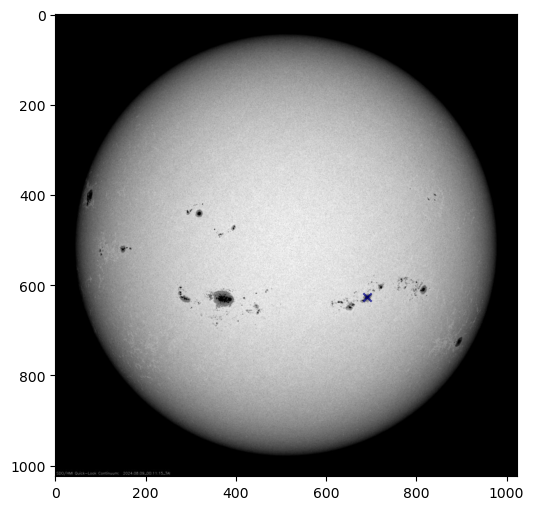

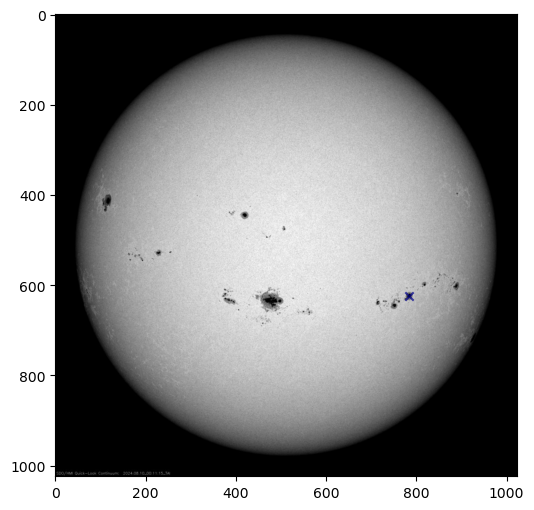

In [7]:
#image check
for i in range(len(file_list)):
    image = mpimg.imread(str(file_list[i]))
    fig, axs = plt.subplots(figsize = (6,6))
    plt.imshow(image, cmap = 'gray')
    plt.scatter([y_list[i]],[z_list[i]], marker = 'x', color = 'darkblue', alpha = 0.7) # Position of the sunspot


# (2) Converting the Cartesian coordinates to the spherical coordinates
### cf) https://en.wikipedia.org/wiki/Spherical_coordinate_system
## $\rm{\phi = sgn(y) \, arccos \frac{x}{\sqrt{x^2 + y^2}}}$
## $\rm{r^2 = x^2 + y^2 + z^2}$
## $\rm{\therefore \, \phi = sgn(y) \, arccos \frac{\sqrt{r^2-y^2-z^2}}{\sqrt{r^2 - z^2}}}$

In [9]:
phi_list = []

for i in range(len(file_list)):
    y = y_list[i] - 512
    z = z_list[i] - 512
    sgn_y = y / np.abs(y)
    
    phi = sgn_y*np.arccos(np.sqrt(r**2 - y**2 - z**2) / np.sqrt(r**2 - z**2))
    phi_list.append(phi)
    
phi_list = np.array(phi_list) *180 /np.pi # radian to the degree unit

Text(0, 0.5, 'Phi (degree)')

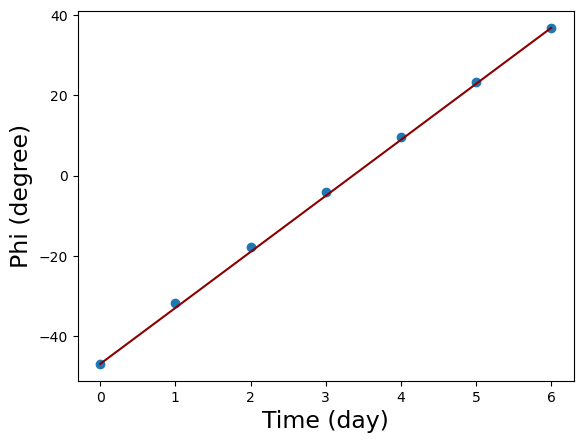

In [10]:
slope = (max(phi_list) - min(phi_list)) / (len(phi_list) -1)
time_array = np.array(range(len(phi_list)))

plt.scatter(time_array, phi_list)
plt.plot(time_array, slope*time_array + min(phi_list), color = 'darkred')
plt.xlabel('Time (day)', fontsize = 17)
plt.ylabel('Phi (degree)', fontsize = 17)

In [11]:
#the period of the solar rotation
print(360/slope) # in the day unit

25.76986318148609
